# Time-Series and the Marchenko-Pastur pdf of covariance matices

We are going to study the eigenvalues of large covariance matrixes using Marchenko-Pastur probability density function of random matices.

<b>Motivation</b><br>
If we find signal in IMRs time-series, that is correlation between time-series, we can consider using neural-networks and other machine learning techniques to forcast our time-series.

From wikipedia: <br><i>
-In the mathematical theory of random matrices, the Marchenko–Pastur distribution, or Marchenko–Pastur law, describes the asymptotic behavior of singular values of large rectangular random matrices. The theorem is named after Ukrainian mathematicians Vladimir Marchenko and Leonid Pastur who proved this result in 1967.

If $X$ denotes a $M x N$ random matrix whose entries are independent identically distributed random variables with mean 0 and variance $\sigma^{2}<\infty$ , let
\begin{equation*}
Y_n = \frac{1}{m}XX^T
\end{equation*}
and let $\lambda _1,\lambda _2, .... \lambda_m$ be the eigenvalues of $Y_n$ (covariance matrix)

</i>

In particular for a correlation matrix - Let $X$ be i.i.d random observations of size $TxN$ where the underlying process generating the observation has mean 0, and variance $\sigma^2$ then the correlation matrix, $C=T^{-1}X^TX$, has eigenvalues $\lambda$ distributed according to the Marchenko-Pastur distribution

\begin{equation*}
f(\lambda) = \frac{T}{N}\frac{\sqrt{( \lambda_+-\lambda )( \lambda_--\lambda )}}{2\pi\lambda\sigma^2}\unicode{x1D7D9}_{(\lambda_-,\lambda_+)}
\end{equation*}

where 
\begin{equation*}
\lambda_+ = \sigma^2(1+\sqrt{\frac{N}{T}})^2 \\
\lambda_- = \sigma^2(1-\sqrt{\frac{N}{T}})^2
\end{equation*}

When C is a correlation matrix, $\sigma^2=1$ <br>
When C is a correlation matrix the eigenvalues are scalar multiples of the eigenvalues of the covariance matrix.

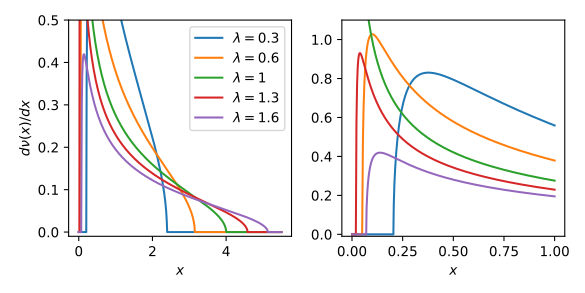

<b>Note:</b>Random matrix theory assumes no auto-correlation (self-similarity) but there is a refinement called Autoregressiv random matrix theory (https://doi.org/10.1063/1.4975217)


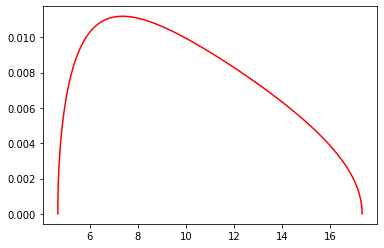

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KernelDensity
import matplotlib.pylab as plt
from scipy.optimize import minimize

#Marcenko-Pastur pdf
#q=T/N 
def mpPDF(var, q, pts):
    eMin, eMax = var*(1-(1./q)**.5)**2, var*(1+(1./q)**.5)**2 # calc lambda_minus, lambda_plus
    eVal = np.linspace(eMin, eMax, pts) #Return evenly spaced numbers over a specified interval. eVal='lambda'
    pdf = q/(2*np.pi*var*eVal)*((eMax-eVal)*(eVal-eMin))**.5 #np.allclose(np.flip((eMax-eVal)), (eVal-eMin))==True
    pdf = pd.Series(pdf, index=eVal)
    return pdf

N = 1000
T = 10000
pdf0 = mpPDF(1., q=N/T, pts=N)
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")

The Weigner eigenvalues displays universality.

1. Macroscopic scale: MP obeys the Weigner semicircle law
2. Mecoscopi scale:
3. Microscopic scale: distribtion of eigenvalues is an open problem in analysis
Terence Tao:(https://www.youtube.com/watch?v=tihxQGGrMcc)

## Correlation matrixes
\begin{equation*}
corr(X,Y) = \frac{cov(X,Y)}{\sigma_x \sigma_y}
\end{equation*}

\begin{equation*}
cov(X,Y) = E[(X-E[X])(Y-E[Y])] = \sum_{i=0}^{i=n} \frac{(X_i-\mu_x)(Y_i-\mu_y)}{n-1}
\end{equation*}
Correlation is just covariance scaled to [-1,1]

The main idea with covariance is that it can identify relationships with positive, negative and no trend.
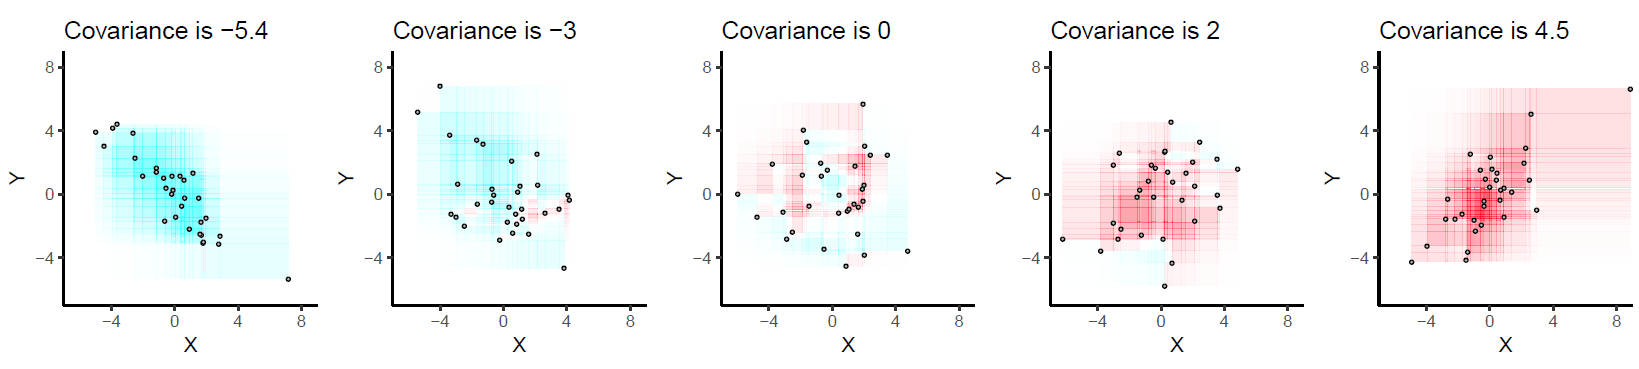

Objective: We would like to use the Marchenko-Pastur distribution to find signal in sets of time-series data. So lets first see how the eigenvalues distribution exactly in the case the Marchenko-Pastur pdf describing. That is, when we sample a random matrix from the normal distribution with mean 0, and variance 1.  

In [3]:
N = 1000 
T = 10000 
x = np.random.normal(0, 1, size = (T, N))
# x has 1000 indicators - one pr column - with rows=10.000 time-steps
cor = np.corrcoef(x, rowvar=0) 
print(cor.shape)

(1000, 1000)


Define a function getPCA to get the eigenvalues, and eigenvectors - sorted.

In [4]:
def getPCA(matrix):
    # Get eVal, eVec from a Hermitian matrix
    eVal, eVec = np.linalg.eig(matrix) #complex Hermitian (conjugate symmetric) or a real symmetric matrix.
    indices = eVal.argsort()[::-1] #arguments for sorting eval desc
    eVal,eVec = eVal[indices],eVec[:,indices]
    eVal = np.diagflat(eVal) # identity matrix with eigenvalues as diagonal
    return eVal,eVec

Lets find the eigenvalues and plot the histogram with MP pdf.

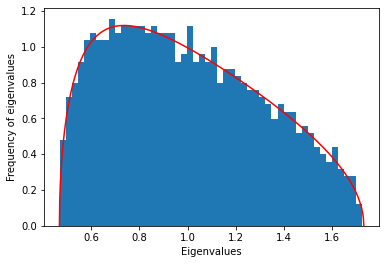

In [5]:
eVal0 , eVec0 = getPCA( cor ) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True,bins=50) # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.ylabel("Frequency of eigenvalues")
plt.xlabel("Eigenvalues")
plt.show()

## Random walk

A random walk can be modeled as a descrete state space and time steps stocastic process and it has no stationary distribution. Does two or more random walks have correlation?


Source:( https://towardsdatascience.com/animated-visualization-of-random-walks-in-python-dc18f01ef15e )

In [6]:
import numpy as np


def random_walk(N, seed):
    """
    Simulates a discrete random walk
    :param int N : the number of steps to take
    """
    np.random.seed(seed)
    # event space: set of possible increments
    #increments = np.array([1, -1])
    # the probability to generate 1
    #p=0.5
    
    # the epsilon values
    #random_increments = np.random.choice(increments, N, p)
    random_increments = np.random.normal(0, 1, size=N) #mu=0, var=1
    # calculate the random walk
    random_walk = np.cumsum(random_increments)
    
    # return the entire walk and the increments
    return random_walk, random_increments
  
  # generate a random walk
N = 50
X, epsilon = random_walk(N, 1234)

# normalize the random walk using the Central Limit Theorem
X = X * np.sqrt(1./N)

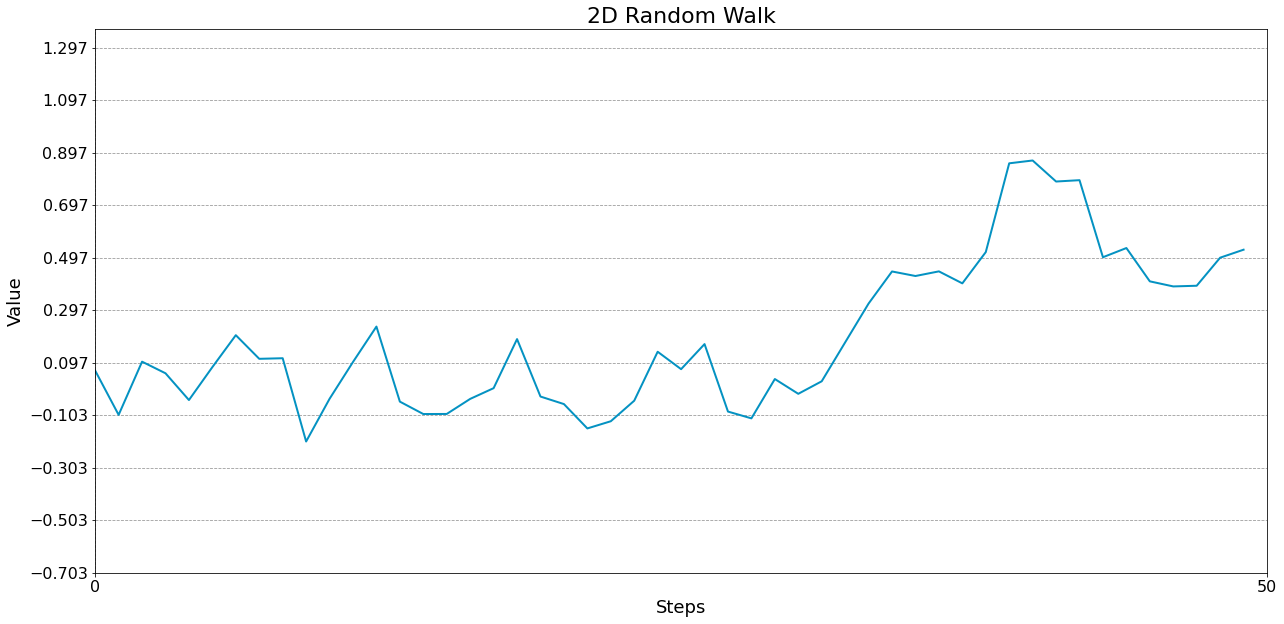

In [9]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import networkx as nx
from matplotlib.animation import FuncAnimation, PillowWriter

fig = plt.figure(figsize=(21, 10))
ax = plt.axes(xlim=(0, N), ylim=(np.min(X) - 0.5, np.max(X) + 0.5)) 
line, = ax.plot([], [], lw=2, color='#0492C2')
ax.set_xticks(np.arange(0, N+1, 50))
ax.set_yticks(np.arange(np.min(X) - 0.5, np.max(X) + 0.5, 0.2))
ax.set_title('2D Random Walk', fontsize=22)
ax.set_xlabel('Steps', fontsize=18)
ax.set_ylabel('Value', fontsize=18)
ax.tick_params(labelsize=16)
ax.grid(True, which='major', linestyle='--', color='black', alpha=0.4)

# initialization function 
def init(): 
    # creating an empty plot/frame 
    line.set_data([], []) 
    return line, 

# lists to store x and y axis points 
xdata, ydata = [], []

# animation function 
def animate(i):
    y = X[i] 
    # appending new points to x, y axes points list 
    xdata.append(i) 
    ydata.append(y) 
    line.set_data(xdata, ydata) 
    return line,

# call the animator	 
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=N, interval=20, blit=True)
anim.save('random_walk.gif',writer=PillowWriter(fps=20)) #writer='imagemagick') 

In [ ]:
N=1000
T=10000
time_series = np.zeros(shape=(T,N))
change_series = np.zeros(shape=(T,N))
X_norm = [0] * N
dt= 1./N # the time step

changeCount=0
for i in range(0,N):
    time_series[:,i], _ = random_walk(T, i)
    X_norm[i] = time_series[T - 1, i] * np.sqrt(dt)

for i in range(0,N):
    changeCount=0
    for j in range(0,T):
        if j>0:
            change_series[j-1, i] = time_series[j, i] - time_series[j-1, i]
        
print(change_series[:,0])

cor = np.corrcoef(time_series, rowvar=0) 
eVal0 , eVec0 = getPCA( cor  ) 

cor1 = np.corrcoef(change_series, rowvar=0) 
eVal_change , _ = getPCA( cor1  ) 
eVal_change = np.diag(eVal_change)

eVal0 = np.diag(eVal0)
print('30 largest eigenvalues from random walk correlation matrix')
print(np.sort(eVal0)[-30:])
q_ = time_series.shape[0]/float(time_series.shape[1])
var=1.
eMin, eMax = var*(1-(1./q_)**.5)**2, var*(1+(1./q_)**.5)**2
print('lambda_pluss from mp pdf')
print(eMax)

eVal1 = np.copy(eVal0)
for i in range(0, len(eVal0)):
    if eVal0[i] > eMax:
        eVal1[i] = 2*eMax


pdf0 = mpPDF(1., q=q_, pts=N)
fig = plt.figure(figsize=(12,8), dpi=100)
ax  = fig.add_subplot(221)
ax1 = plt.subplot(222)
ax2 = plt.subplot(223)
ax3 = plt.subplot(224)
ax.hist(eVal_change, density=True, bins=50)
ax.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
ax1.hist(eVal1, density = True, bins=50) # Histogram the eigenvalues
ax1.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
ax2.hist(change_series.flatten(), bins=25, density=True, color='#0492C2')
ax3.hist(X_norm, bins=25, density=True, color='#0492C2')


ax.set_ylabel("Frequency of eigenvalues - ds/dt random walk")
ax.set_xlabel("Eigenvalues")
ax1.set_ylabel("Frequency of eigenvalues - random walk")
ax1.set_xlabel("Eigenvalues")
ax2.set_ylabel("Frequency of change")
ax2.set_xlabel("ds/dt, s=step, t=time")
ax3.set_ylabel("Freq. ch. in last step (T) in time series")
ax3.set_xlabel("step size")
plt.show()


## Creating time series with signal

In [7]:
time_series = np.random.normal(0, 1, size = (T, N))
x = time_series

sin_np = np.sin([i for i in range(0,T)])
sin_plus_pi_fourth = sin_np + np.pi/4
cos_np = np.cos([i for i in range(0,T)])

x[:,0] = -sin_np #np.ones(T)
x[:,1] = -sin_np

print(x.shape)

(100000, 1000)


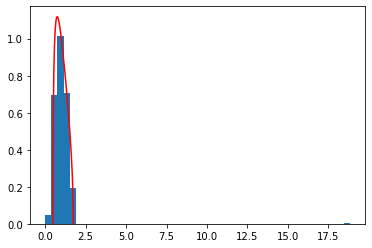

In [24]:

for j in range(2,10):
    x[:,j] += (2*sin_np) #+
    
for j in range(11,20):
    x[:,j] = sin_plus_pi_fourth #+

# indicator 0-20 has correlation
cor = np.corrcoef(x, rowvar=0) 

eVal0 , eVec0 = getPCA( cor ) 
pdf0 = mpPDF(1., q=x.shape[0]/float(x.shape[1]), pts=N)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal0), density = True,bins=50) # Histogram the eigenvalues
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.show()

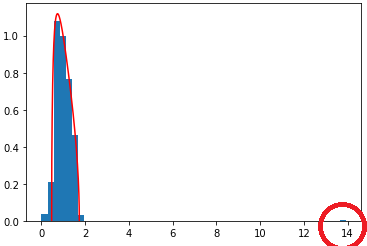

The histogram suggests there is some kind of correlation in the set of indicators (surprise!). Lets see if we can find where the signal is. 

We do this by clustering in the correlation matrix using KMeans clustering and the silhouett method for finding the optimal numbers of clusters. KMeans takes as argument the number of clusters, but using the silhouett method we dont have to specify how many clusters there are. We would like the data to tell us.

The optimal number of clusters is found by maximizing withing group correlation and minimizing between group correlation.

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import seaborn as sns

#Use a silhouett method to find optimal number of clusters for KMeans clustering
def clusterKMeansBase(corr0, maxNumClusters=10, n_init=10):
    x, silh = ((1-corr0.fillna(0))/2.)**.5, pd.Series(dtype='float64') #observations matrix
    x, silh = ((1-corr0)/2.)**.5, pd.Series(dtype='float64') #observations matrix
    maxNumClusters = min(maxNumClusters, x.shape[0]-1)
    for init in range(n_init):
        for i in range(2, maxNumClusters+1):
            #print(i)
            kmeans_ = KMeans(n_clusters=i, n_init=1) #n_jobs=None, n_init=1) #n_jobs=None - use all CPUs
            kmeans_ = kmeans_.fit(x)
            silh_ = silhouette_samples(x, kmeans_.labels_)
            stat = (silh_.mean()/silh_.std(), silh.mean()/silh.std())
            if np.isnan(stat[1]) or stat[0] > stat[1]:
                silh, kmeans = silh_, kmeans_
    
    newIdx = np.argsort(kmeans.labels_)
    corr1 = corr0.iloc[newIdx] #reorder rows
    
    corr1 = corr1.iloc[:, newIdx] #reorder columns
    clstrs = {i:corr0.columns[np.where(kmeans.labels_==i)[0]].tolist() for i in np.unique(kmeans.labels_)} #cluster members
    silh = pd.Series(silh, index=x.index)
    
    return corr1, clstrs, silh

Lets apply it to the correlation matrix with signal.

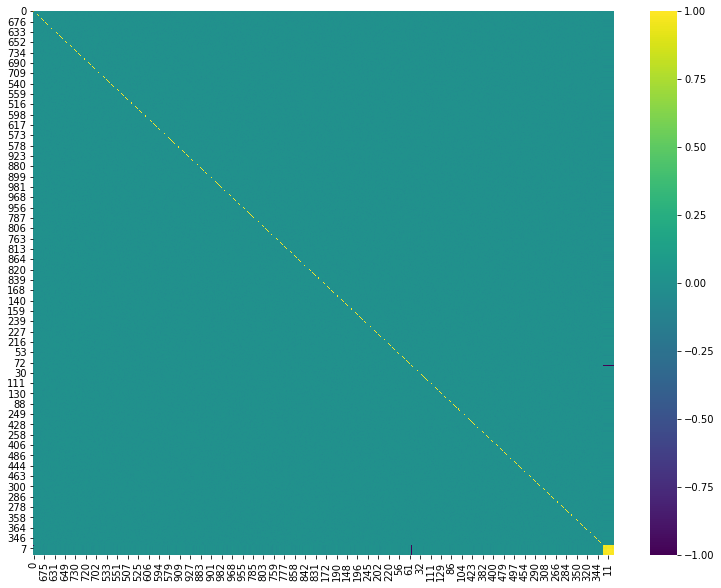

{0: [0, 1, 10, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 

In [26]:
corr0, clstrs, silh = clusterKMeansBase(pd.DataFrame(cor), maxNumClusters=10, n_init=10)
fig, ax = plt.subplots(figsize=(13,10))  
sns.heatmap(corr0, cmap='viridis')
plt.show()
print(clstrs)

In [ ]:
The theoretical mp-pdf requires two parameters q=T/N given by the shape of the time series matrix, and variance.
Its important to get an estimate of the variance from an empirical covariance matrix.
This is what fitKDE(), findMaxEval(), and errPDFs() does.

Signal is added to a covariance matrix with getRndCov()

sse:746.4188629263416
sse:746.4187701953264
sse:288.0391609751431
sse:288.0391571825062
sse:280.0504156050458
sse:280.0504199782626
sse:234.92220146348296
sse:234.92220910784695
sse:194.6827652829719
sse:194.68272719237825
sse:189.5032744266328
sse:189.50328406790592
sse:19.761383771767854
sse:19.761387308261305
sse:19.050209594200044
sse:19.050206550866314
sse:156.01472839138899
sse:156.0147391911931
sse:18.02377454429717
sse:18.023775460038603
sse:17.909695986991906
sse:17.909696039844277
sse:17.90932368515289
sse:17.909323684163592
sse:17.909323554328815
sse:17.909323554329756
sse:17.909323554329134
sse:17.909323554329134
sse:17.90932355432878
sse:17.90932355432969
sse:17.909323554328715
sse:17.909323554329635
sse:17.909323554328928
sse:17.909323554329333
sse:17.909323554328783
sse:17.909323554329596
found errPDFs0.6771983653648342


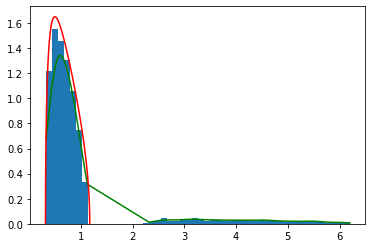

In [57]:
def getRndCov(nCols, nFacts): #nFacts - contains signal out of nCols
    w = np.random.normal(size=(nCols, nFacts))
    cov = np.dot(w, w.T) #random cov matrix, however not full rank
    cov += np.diag(np.random.uniform(size=nCols)) #full rank cov
    return cov

def cov2corr(cov):
    # Derive the correlation matrix from a covariance matrix
    std = np.sqrt(np.diag(cov))
    corr = cov/np.outer(std,std)
    corr[corr<-1], corr[corr>1] = -1,1 #for numerical errors
    return corr

alpha, nCols, nFact, q = .995, 1000, 100, 10
cov = np.cov(np.random.normal(size=(nCols*q, nCols)), rowvar=0) #size = (1000*10,1000)
cov = alpha*cov+(1-alpha)*getRndCov(nCols, nFact) # noise + signal
corr0 = cov2corr(cov)
eVal01, eVec01 = getPCA(corr0)

#find the variance of the matrix with signal
#######################
from sklearn.neighbors import KernelDensity

def fitKDE(obs, bWidth=.15, kernel='gaussian', x=None):
    #Fit kernel to a series of obs, and derive the prob of obs
    # x is the array of values on which the fit KDE will be evaluated
    #print(len(obs.shape) == 1)
    if len(obs.shape) == 1: obs = obs.reshape(-1,1)
    kde = KernelDensity(kernel = kernel, bandwidth = bWidth).fit(obs)
    #print(x is None)
    if x is None: x = np.unique(obs).reshape(-1,1)
    #print(len(x.shape))
    if len(x.shape) == 1: x = x.reshape(-1,1)
    logProb = kde.score_samples(x) # log(density)
    pdf = pd.Series(np.exp(logProb), index=x.flatten())
    return pdf

# find max random eVal by fitting Marcenko's dist
# and return variance
def findMaxEval(eVal, q, bWidth):
    out = minimize(lambda *x: errPDFs(*x), x0=np.array(0.5), args=(eVal, q, bWidth), bounds=((1E-5, 1-1E-5),))
    print("found errPDFs"+str(out['x'][0]))
    if out['success']: var = out['x'][0]
    else: var=1
    eMax = var*(1+(1./q)**.5)**2
    return eMax, var

#snippet 2.4 - fitting the marcenko-pastur pdf - find variance
#Fit error
def errPDFs(var, eVal, q, bWidth, pts=1000):
    var = var[0]
    pdf0 = mpPDF(var, q, pts) #theoretical pdf
    pdf1 = fitKDE(eVal, bWidth, x=pdf0.index.values) #empirical pdf
    sse = np.sum((pdf1-pdf0)**2)
    print("sse:"+str(sse))
    return sse 

###############

eMax0, var0 = findMaxEval(np.diag(eVal01), q, bWidth=.01)

pdf0 = mpPDF(var0, q=10, pts=1000)
fig = plt.figure()
ax  = fig.add_subplot(111)
ax.hist(np.diag(eVal01), density = True, bins=50) # Histogram the eigenvalues
pdf2 = fitKDE(np.diag(eVal01), bWidth=.15) #empirical pdf
plt.plot(pdf2.keys(), pdf2, color='g', label="Eigenvalues of random-matrix with signal")
plt.plot(pdf0.keys(), pdf0, color='r', label="Marcenko-Pastur pdf")
plt.show()

Red line is theoretical pdf, green line is best fit line of empirical eigenvalues using fitKDE().

In [57]:
x.shape[0]/float(x.shape[1]) #q

10.0